## Get the Data

1.   List item
2.   List item



Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [99]:
df = pd.read_csv("QueryResultsTillJune2021.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [100]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [101]:
df.tail()

,DATE,TAG,POSTS
2141,2021-06-01 00:00:00,java,9283
2142,2021-06-01 00:00:00,ruby,437
2143,2021-06-01 00:00:00,perl,160
2144,2021-06-01 00:00:00,swift,2098
2145,2021-06-01 00:00:00,r,4602


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [102]:
df.shape

(2146, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [103]:
df.count()

DATE     2146
TAG      2146
POSTS    2146
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [106]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,38158
c,360940
c#,1485890
c++,729520
delphi,48201
go,54471
java,1784536
javascript,2236535
perl,65646


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [107]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,155,155
c,155,155
c#,156,156
c++,155,155
delphi,155,155
go,140,140
java,155,155
javascript,155,155
perl,155,155


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [108]:
print(type(df.DATE[1]))
df.DATE[1]

<class 'str'>


'2008-08-01 00:00:00'

In [109]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [110]:
# Converting Entire Columns
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [111]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
# reshaped_df

In [112]:
reshaped_df.shape

(156, 14)

In [113]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [114]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,754.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,159.0,NaN


In [115]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-02-01,256.0,2365.0,6612.0,4489.0,203.0,631.0,9219.0,18064.0,134.0,5296.0,25126.0,5009.0,604.0,2734.0
2021-03-01,341.0,2672.0,7352.0,4762.0,271.0,830.0,10494.0,19931.0,154.0,5633.0,28348.0,6051.0,571.0,2921.0
2021-04-01,344.0,2474.0,6809.0,4379.0,188.0,688.0,9574.0,18807.0,143.0,5175.0,26777.0,5639.0,607.0,2547.0
2021-05-01,339.0,2316.0,6725.0,4714.0,180.0,721.0,9958.0,18880.0,127.0,5285.0,26645.0,5463.0,453.0,2240.0
2021-06-01,312.0,2032.0,6567.0,4251.0,124.0,676.0,9283.0,17424.0,160.0,5436.0,24414.0,4602.0,437.0,2098.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [116]:
reshaped_df.count()

TAG
assembly      155
c             155
c#            156
c++           155
delphi        155
go            140
java          155
javascript    155
perl          155
php           155
python        155
r             153
ruby          155
swift         147
dtype: int64

In [117]:
reshaped_df.isna().values.any()

True

In [118]:
reshaped_df.fillna(value=0, inplace=True)

In [119]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,159.0,0.0


In [120]:
reshaped_df.isna().values.any()

False

In [121]:
reshaped_df.count()

TAG
assembly      156
c             156
c#            156
c++           156
delphi        156
go            156
java          156
javascript    156
perl          156
php           156
python        156
r             156
ruby          156
swift         156
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

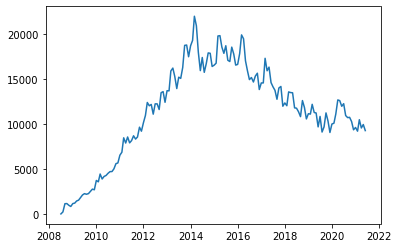

In [122]:
plt.plot(reshaped_df.index, reshaped_df.java)

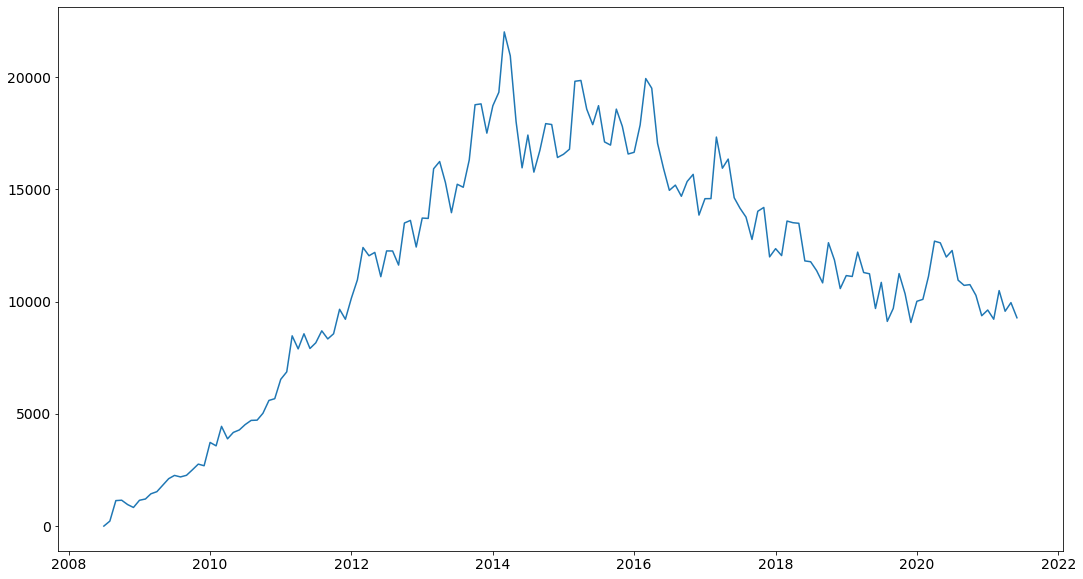

In [123]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

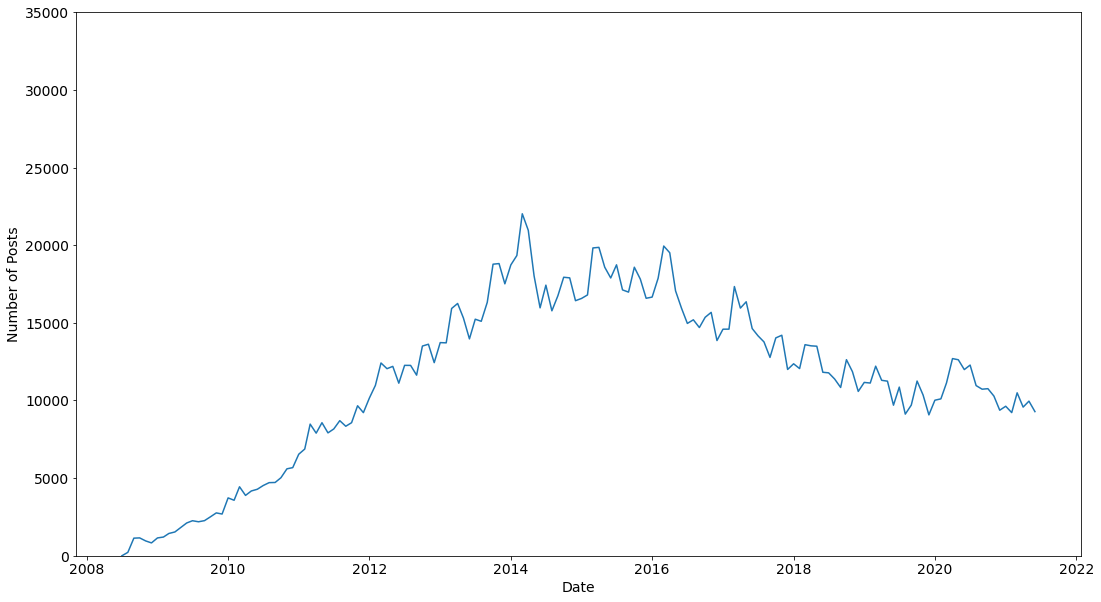

In [124]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

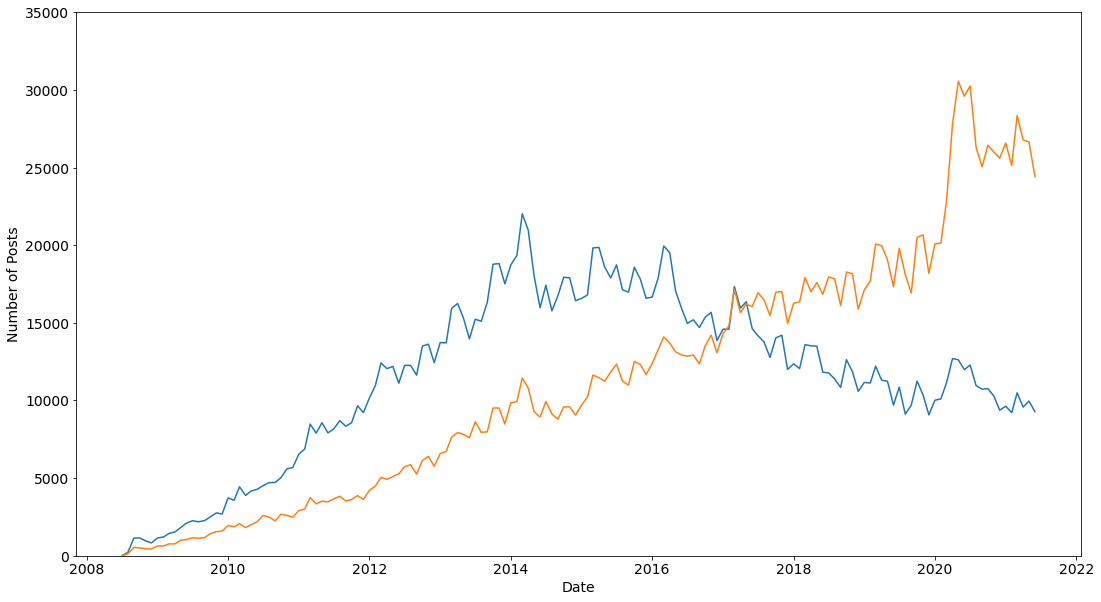

In [125]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

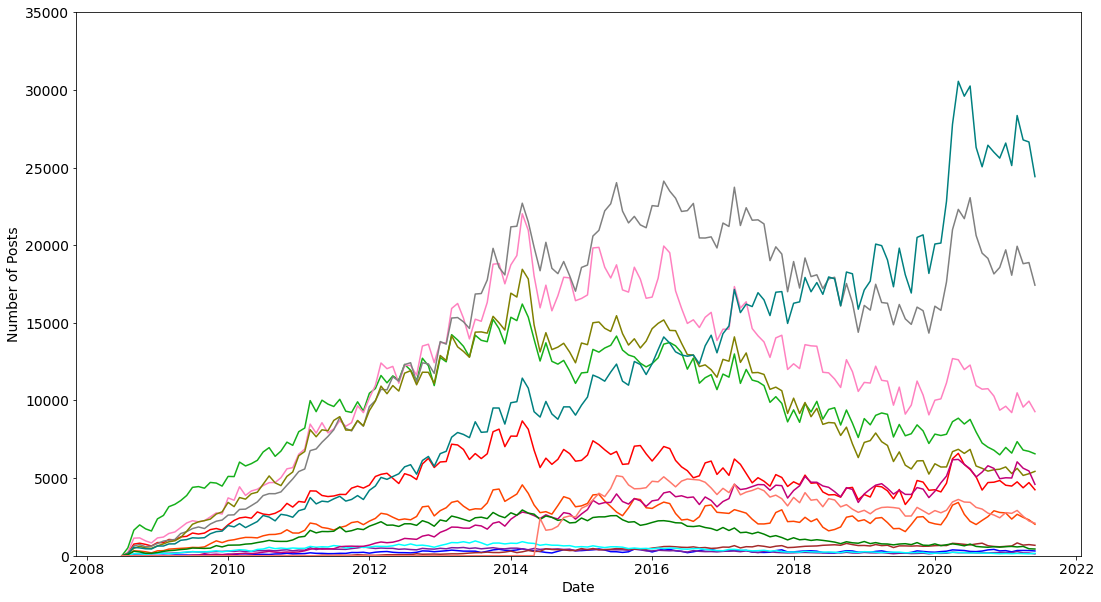

In [139]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)


# Custom Colors List
colors_list = ["#0000FF", "#FF4500", "#15B01A", "#FF0000", "#7E1E9C",
               "#A52A2A", "#FF81C0", "#808080", "#00FFFF", "#808000",
               "#008080", "#C20078", "#008000", "#FF796C"]
color_index = 0

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
           color=colors_list[color_index])
  
  color_index += 1

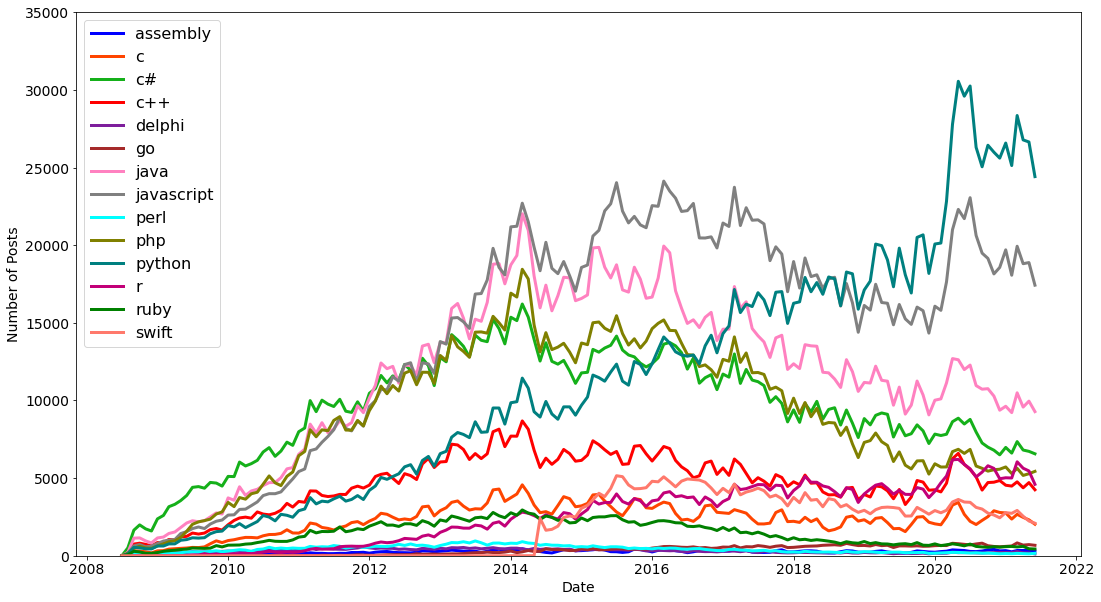

In [141]:
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)


# Custom Colors List
colors_list = ["#0000FF", "#FF4500", "#15B01A", "#FF0000", "#7E1E9C",
               "#A52A2A", "#FF81C0", "#808080", "#00FFFF", "#808000",
               "#008080", "#C20078", "#008000", "#FF796C"]
color_index = 0

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
           linewidth=3, label=reshaped_df[column].name,
           color=colors_list[color_index])
  
  color_index += 1


plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

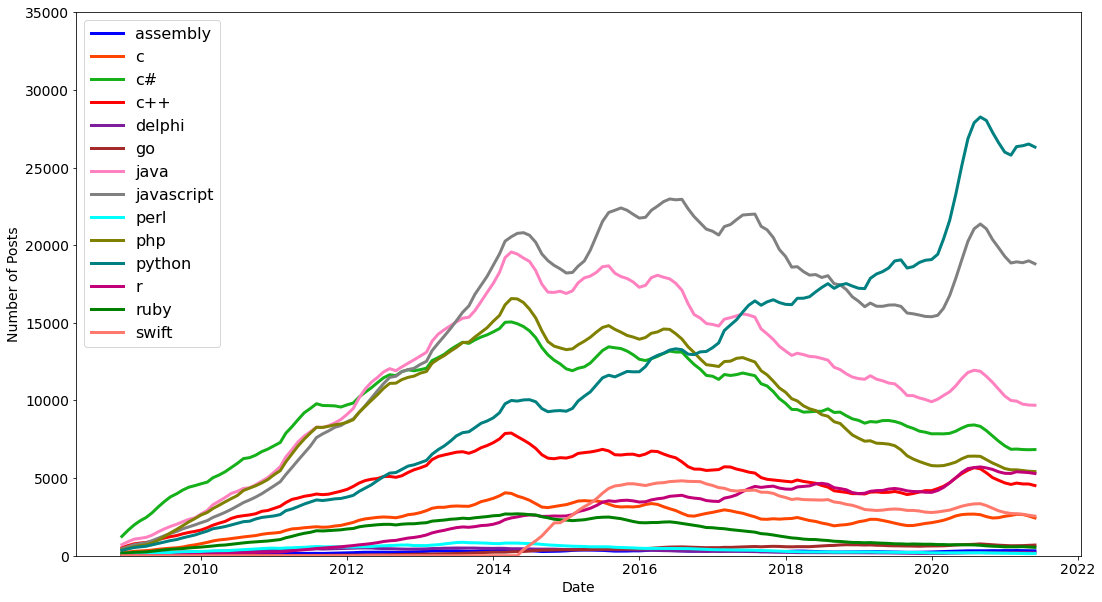

In [137]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# Custom Colors List
colors_list = ["#0000FF", "#FF4500", "#15B01A", "#FF0000", "#7E1E9C",
               "#A52A2A", "#FF81C0", "#808080", "#00FFFF", "#808000",
               "#008080", "#C20078", "#008000", "#FF796C"]
color_index = 0

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name,
           color=colors_list[color_index])
  
  color_index += 1

plt.legend(fontsize=16)

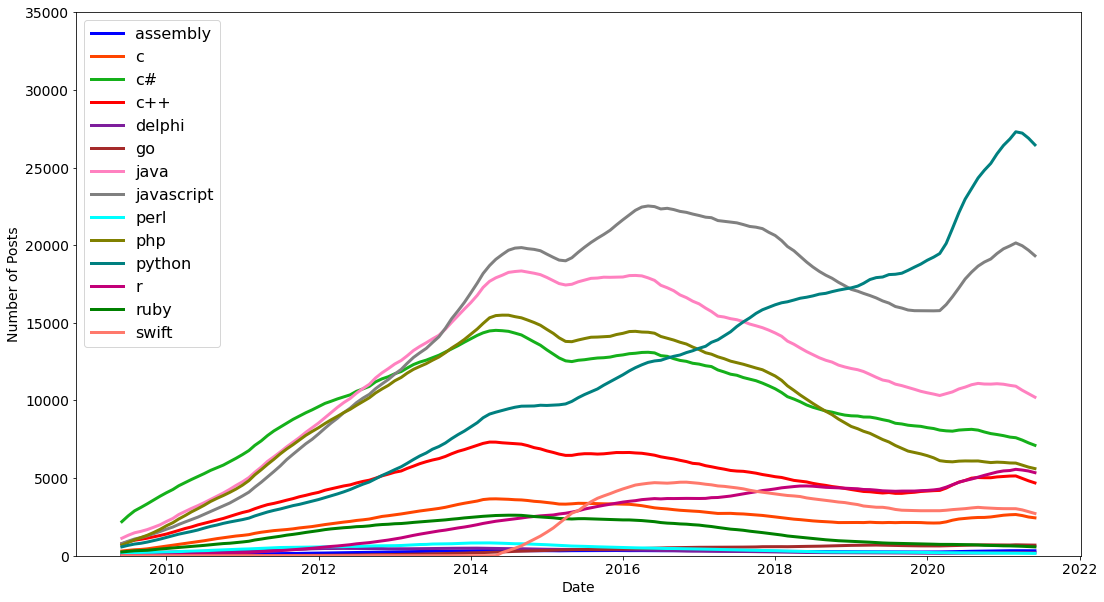

In [142]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(18, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# Custom Colors List
colors_list = ["#0000FF", "#FF4500", "#15B01A", "#FF0000", "#7E1E9C",
               "#A52A2A", "#FF81C0", "#808080", "#00FFFF", "#808000",
               "#008080", "#C20078", "#008000", "#FF796C"]
color_index = 0

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name,
           color=colors_list[color_index])
  
  color_index += 1

plt.legend(fontsize=16)

## **MOST POPULAR PROGRAMMING LANGUAGE ANALYSIS**

---



Looking at the data, what was the most popular programming language from 2008 to 2014 by the number of posts?

In [143]:
slice_df = reshaped_df.loc["2008-01-01":"2014-01-01"]
q2_dict = slice_df.sum()
posts = 0
lang = ""
for column in reshaped_df.columns:
  value = q2_dict[column]
  if value > posts:
    lang = reshaped_df[column].name
    posts = value

print(f"The most popular programming language from 2008 to 2014 {lang} with {int(posts)} posts.")

The most popular programming language from 2008 to 2014 c# with 560337 posts.


Looking at the data, what was the most popular programming language from 2015 to 2019 by the number of posts?

In [146]:
slice_df = reshaped_df.loc["2015-01-01":"2019-01-01"]
q2_dict = slice_df.sum()
posts = 0
lang = ""
for column in reshaped_df.columns:
  value = q2_dict[column]
  if value > posts:
    lang = reshaped_df[column].name
    posts = value

print(f"The most popular programming language from 2015 to 2019 {lang} with {int(posts)} posts.")

The most popular programming language from 2015 to 2019 javascript with 994461 posts.
